# 车道线检测

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(img)

In [2]:
# 读取视频数据
capture = cv.VideoCapture("img/road.mp4")
capture.isOpened()

True

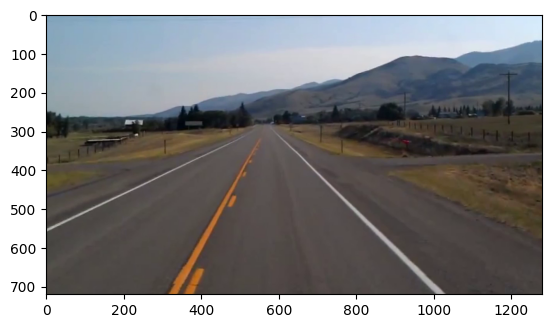

In [3]:
# 读取视频中的一帧数据
success,frame = capture.read()
imshow(frame)

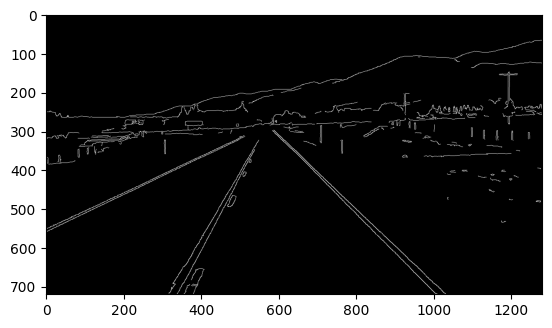

In [5]:
gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
# 边缘检测
canny_img = cv.Canny(gray,50,100)
imshow(canny_img)

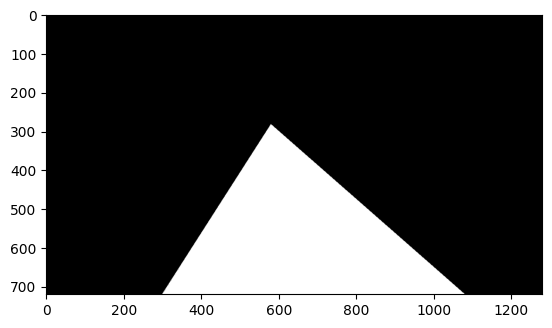

In [6]:
# 提取感兴趣的区域
height,width = frame.shape[0:2]
points = np.array([[(300,height),(1080,height),(580,283)]])
# 创建mask蒙版
mask = np.zeros_like(gray)
cv.fillPoly(mask,points,255)
imshow(mask)

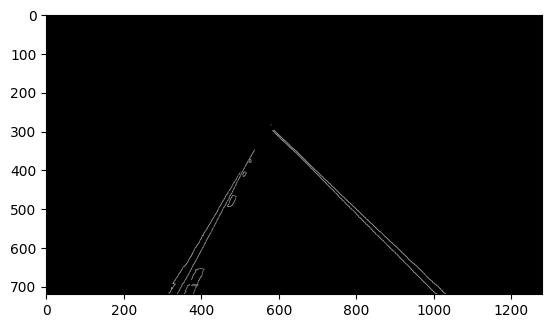

In [7]:
# 利用mask从canny图中抠出感兴趣的区域
roi_img = cv.bitwise_and(canny_img,mask)
imshow(roi_img)

In [9]:
# 霍夫直线变换
rho = 1
theta = np.pi/180
thresh = 20
lines = cv.HoughLinesP(roi_img,rho,theta,thresh,minLineLength=10,maxLineGap=1)
lines

array([[[ 840,  538,  851,  549]],

       [[ 767,  469,  838,  538]],

       [[ 381,  643,  444,  524]],

       [[ 951,  664, 1006,  719]],

       [[ 643,  354,  683,  394]],

       [[ 939,  653, 1004,  718]],

       [[ 441,  507,  472,  453]],

       [[ 979,  671, 1004,  695]],

       [[ 370,  629,  379,  615]],

       [[ 727,  439,  780,  494]],

       [[ 496,  426,  524,  372]],

       [[ 828,  541,  843,  556]],

       [[ 585,  301,  631,  345]],

       [[ 588,  298,  642,  350]],

       [[ 473,  453,  495,  416]],

       [[ 865,  578,  895,  609]],

       [[ 408,  563,  445,  501]],

       [[ 665,  372,  694,  400]],

       [[ 379,  612,  391,  591]],

       [[ 942,  635,  978,  670]],

       [[ 740,  443,  782,  485]],

       [[ 480,  459,  495,  426]],

       [[ 468,  493,  473,  483]],

       [[ 697,  402,  731,  436]],

       [[ 855,  568,  868,  582]],

       [[ 879,  576,  923,  616]],

       [[ 374,  683,  382,  667]],

       [[ 458,  498,  467,  

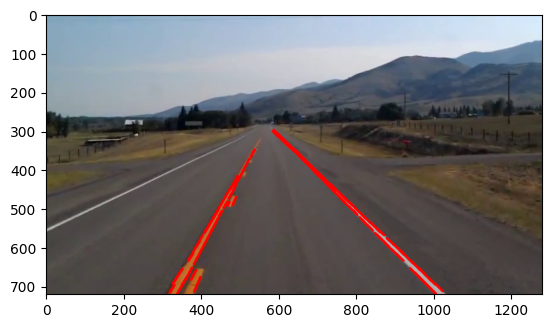

In [10]:
# 在图像上画出所有的线段
line_img = frame.copy()
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(line_img,(x1,y1),(x2,y2),(0,0,255),5)
imshow(line_img)

In [11]:
# 将左右两边的多条线段合并成一条线段
# 计算平均斜率和截距
left_params = []
right_params = []
for line in lines:
    x1,y1,x2,y2 = line[0]
    params = np.polyfit((x1,x2),(y1,y2),1)
    k = params[0]
    b = params[1]
    if k > 0:
        right_params.append(params)
    else:
        left_params.append(params)

In [12]:
# 计算左右两边的平均值
avg_left_params = np.average(left_params,axis=0)
avg_right_params = np.average(right_params,axis=0)

In [15]:
# 构造左右两边的直线
def calc_line(y,k,b):
    x = (y - b)/k
    y2 = y/2
    x2 = (y2 - b)/k
    return (int(x),int(y)),(int(x2),int(y2))
k = avg_left_params[0]
b = avg_left_params[1]
pt_l1,pt_l2 = calc_line(height,k,b)

k = avg_right_params[0]
b = avg_right_params[1]
pt_r1,pt_r2 = calc_line(height,k,b)

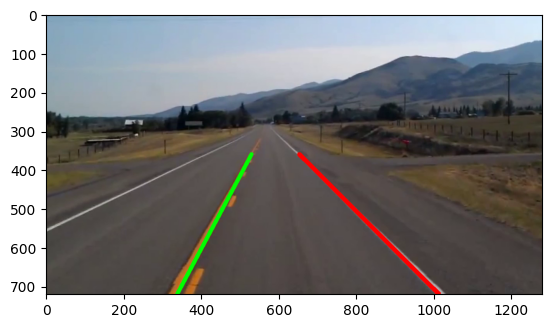

In [17]:
# 绘制左右两边的直线
result_img = frame.copy()

cv.line(result_img,pt_r1,pt_r2,(0,0,255),10)
cv.line(result_img,pt_l1,pt_l2,(0,255,0),10)
imshow(result_img)